<a href="https://colab.research.google.com/github/OlegBEZb/MLHack_non_copyrighted/blob/master/BigGAN/pytorch-pretrained-BigGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs import

In [6]:
!git clone https://github.com/DmitryUlyanov/deep-image-prior.git

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 257, done.
remote: Total 257 (delta 0), reused 0 (delta 0), pack-reused 257
Receiving objects: 100% (257/257), 24.26 MiB | 8.02 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [28]:
!pip install torch==1.4.0
!pip install pytorch-pretrained-biggan

     |████████████████████████████████| 753.4MB 20kB/s 
  Found existing installation: torch 0.4.1
    Uninstalling torch-0.4.1:
      Successfully uninstalled torch-0.4.1


In [1]:
import os, csv, random, pickle, re, sys
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
import gc
from collections import Counter
import matplotlib.pyplot as plt

import torch
print(torch.__version__)
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)
import nltk
nltk.download('wordnet')

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

# import tensorflow.keras.backend as K
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
# from tensorflow.keras.layers import Activation, Dropout, CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D, CuDNNGRU
# from tensorflow.keras.callbacks import LearningRateScheduler, Callback, ModelCheckpoint

import tensorflow as tf
%tensorflow_version 1.x
print(tf.__version__)

import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

1.4.0
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1.15.0


TODO: check if we can no to use this sess and use only default session

In [0]:
# Initialize session
sess = tf.Session()

# Check GPU

In [3]:
if tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
):
    print(tf.test.gpu_device_name())

/device:GPU:0


# Authorization on Google drive and configurings paths

In [0]:
WORKSPACE = 'COLAB' # or 'KAGGLE'

In [5]:
if WORKSPACE == 'COLAB':
    from google.colab import drive
    drive.mount('/content/drive')

    data_folder = os.path.join('/content/drive/My Drive', 'MLHack_2020')
    output_folder = os.path.join(data_folder, 'output')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

elif WORKSPACE == 'KAGGLE':
    pass
else: # TODO: add computing on premise
    pass

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#BigGAN

In [15]:
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-512')

# Prepare a input
truncation = 0.4
batch_size = 4
class_vector = one_hot_from_names(['seashore', 'jeep', 'space shuttle', 'park bench'], batch_size=batch_size)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=batch_size)

# All in tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# If you have a GPU, put everything on cuda
noise_vector = noise_vector.to('cuda')
class_vector = class_vector.to('cuda')
model.to('cuda')

# Generate an image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# If you have a GPU put back on CPU
output = output.to('cpu')

# If you have a sixtel compatible terminal you can display the images in the terminal
# (see https://github.com/saitoha/libsixel for details)
#display_in_terminal(output)

# Save results as png images
save_as_images(output, os.path.join(output_folder, 'output'))

INFO:pytorch_pretrained_biggan.model:loading model biggan-deep-512 from cache at /root/.pytorch_pretrained_biggan/07b5c0d1791fa2028f8aa458a36360f31e1549d44152c96579b3ad6b35055d34.c33e135ad91e13528d0b83edc3c53c7bf94f620bdf8bc2bf08be82ba6d602e62
INFO:pytorch_pretrained_biggan.model:Model config {
  "attention_layer_position": 8,
  "channel_width": 128,
  "class_embed_dim": 128,
  "eps": 0.0001,
  "layers": [
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      16
    ],
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      8
    ],
    [
      false,
      8,
      8
    ],
    [
      true,
      8,
      8
    ],
    [
      false,
      8,
      8
    ],
    [
      true,
      8,
      4
    ],
    [
      false,
      4,
      4
    ],
    [
      true,
      4,
      2
    ],
    [
      false,
      2,
      2
    ],
    [
      true,
      2,
      1
    ],
    [
      false,
      1,
      1
    ],
    [
      true,
      1,
   

#deep-image-prior denoising

In [0]:
import sys
sys.path.append('/content/deep-image-prior')

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from skimage.measure import compare_psnr
from utils.denoising_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True
sigma = 25
sigma_ = sigma/255.

In [0]:
## denoising
fname = os.path.join(data_folder, 'boy_wm.jpg')

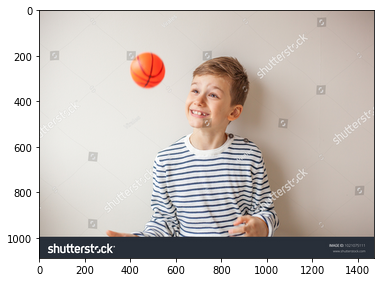

In [25]:
img_noisy_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_noisy_np = pil_to_np(img_noisy_pil)

# As we don't have ground truth
img_pil = img_noisy_pil
img_np = img_noisy_np

if PLOT:
    plot_image_grid([img_np], 4, 5);

In [0]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

reg_noise_std = 1./30. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99


num_iter = 2400
input_depth = 3
figsize = 5 

net = skip(
            input_depth, 3, 
            num_channels_down = [8, 16, 32, 64, 128], 
            num_channels_up   = [8, 16, 32, 64, 128],
            num_channels_skip = [0, 0, 0, 4, 4], 
            upsample_mode='bilinear',
            need_sigmoid=True, need_bias=True, pad=pad, act_fun='LeakyReLU')

net = net.type(dtype)

In [27]:
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype)

Number of params: 572827


Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_

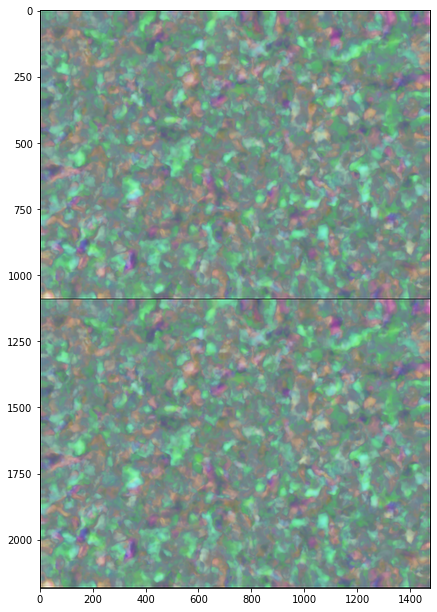

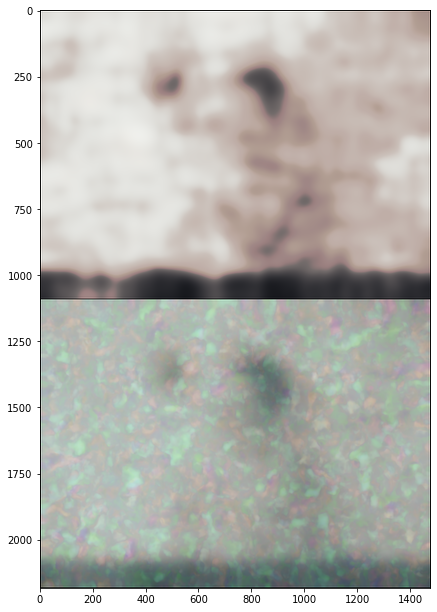

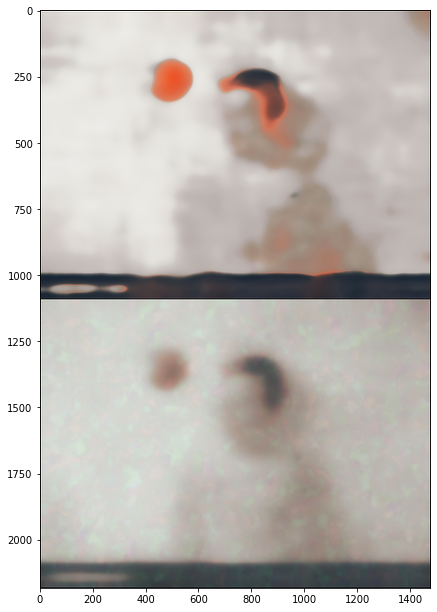

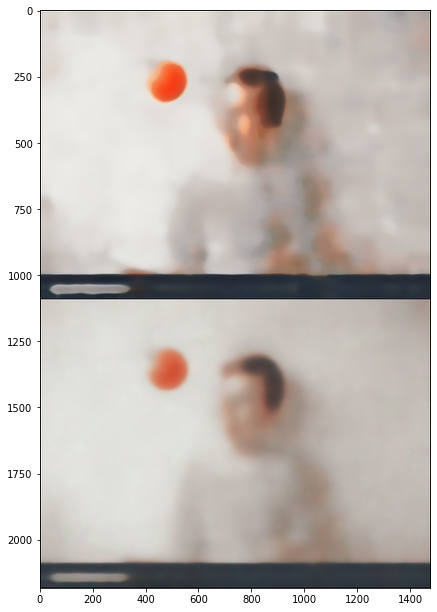

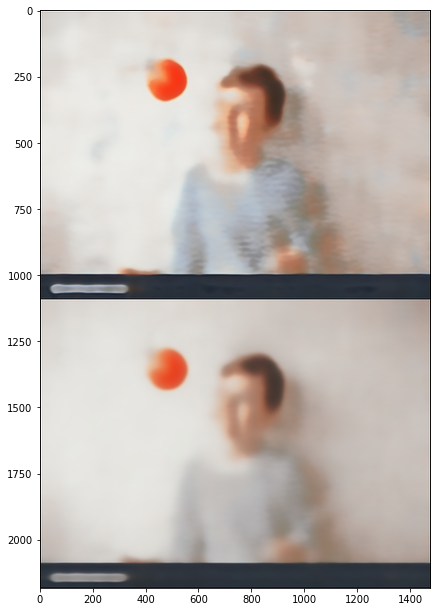

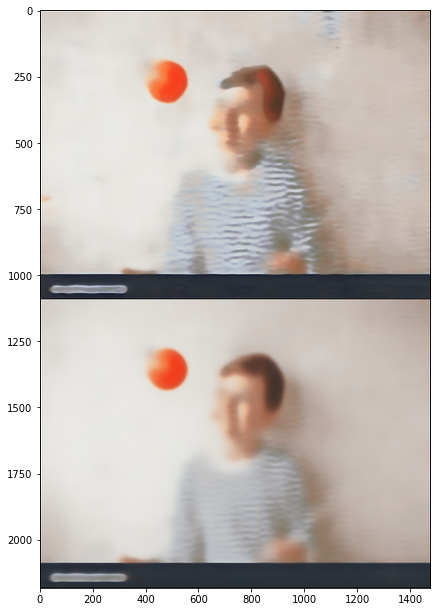

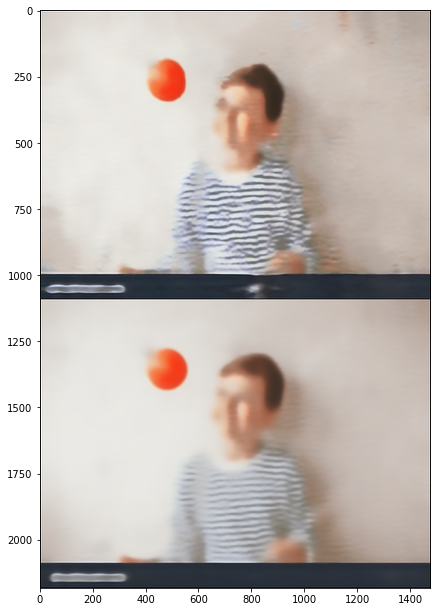

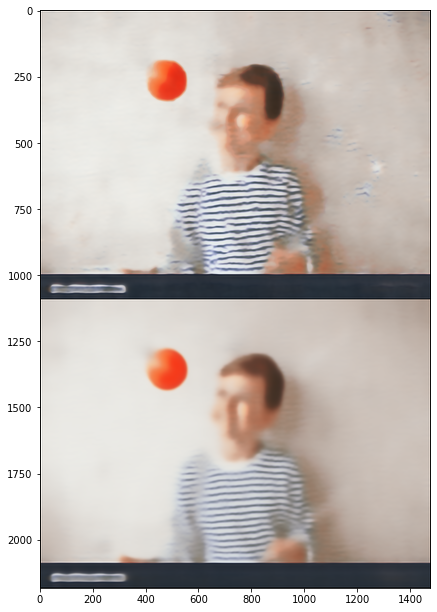

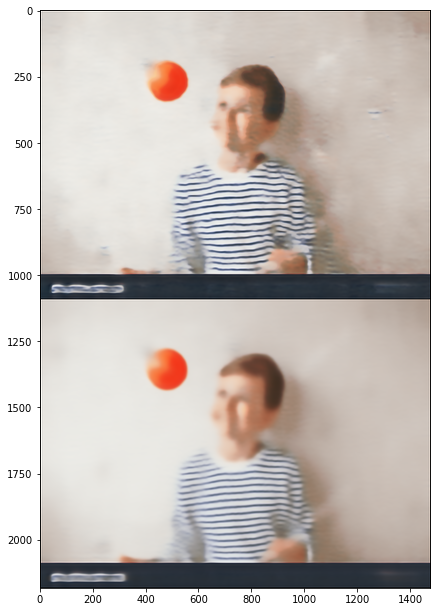

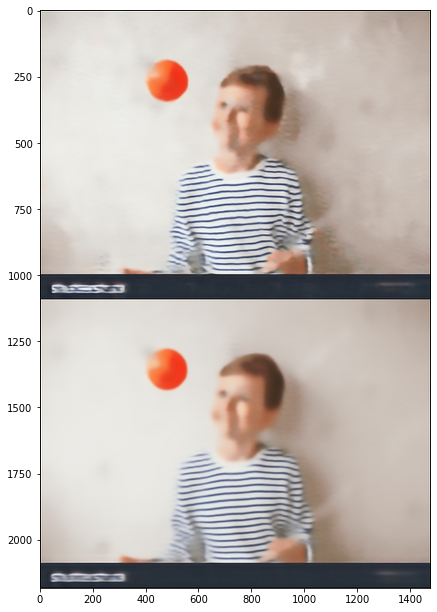

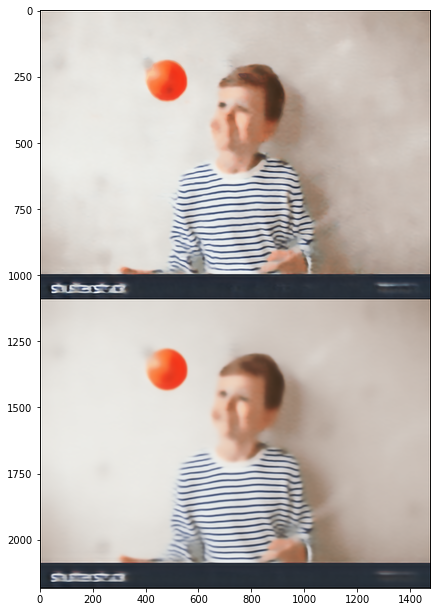

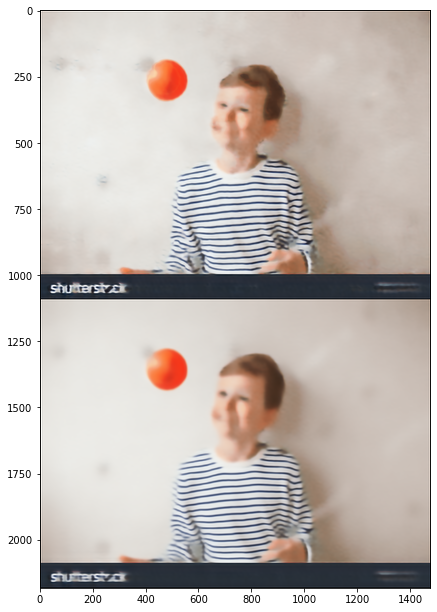

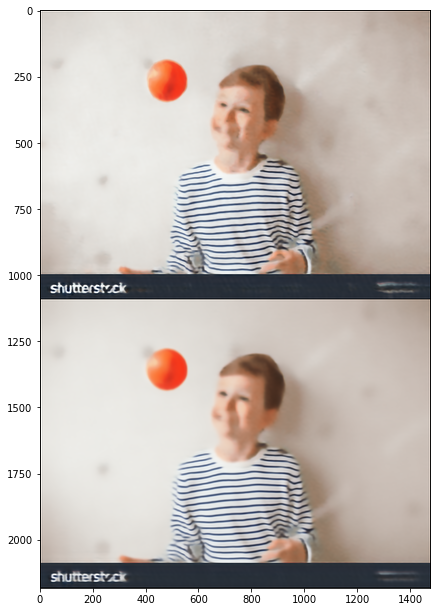

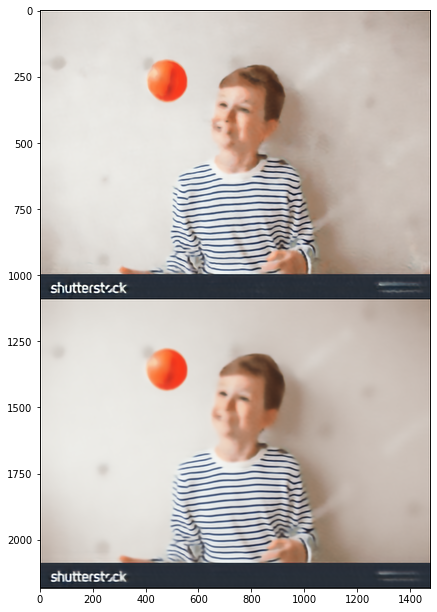

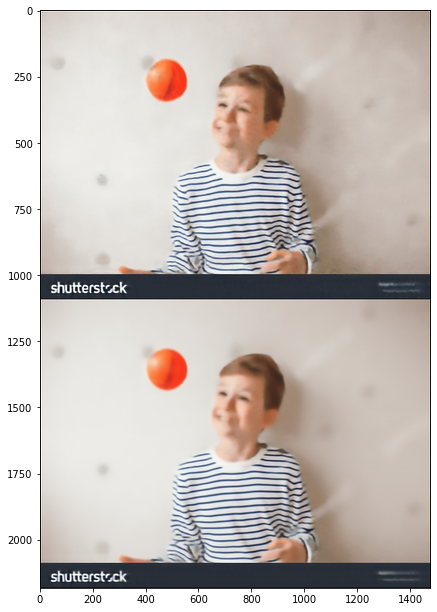

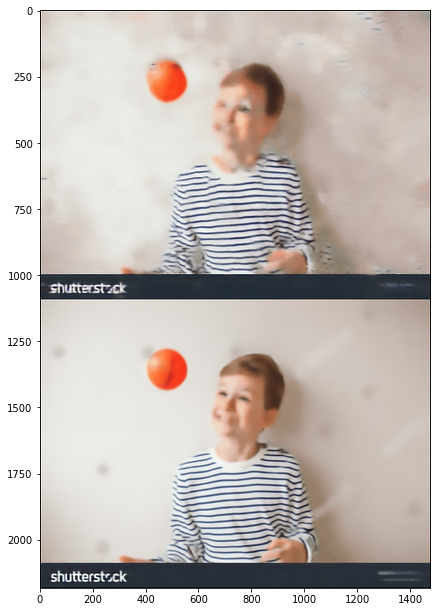

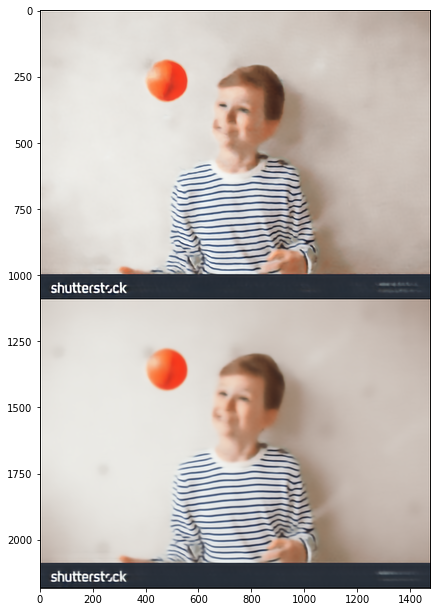

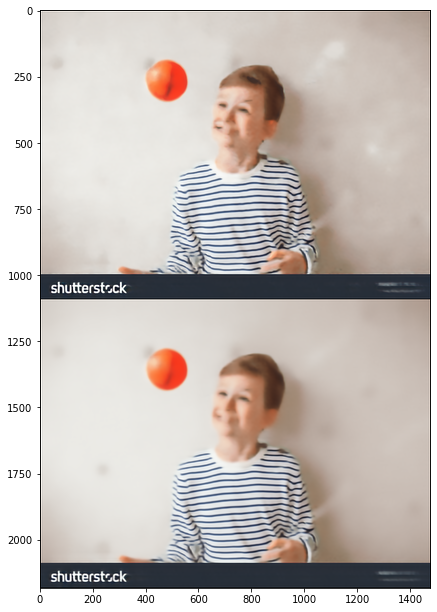

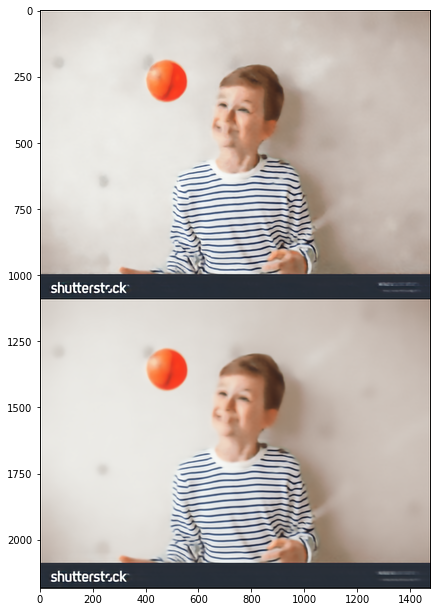

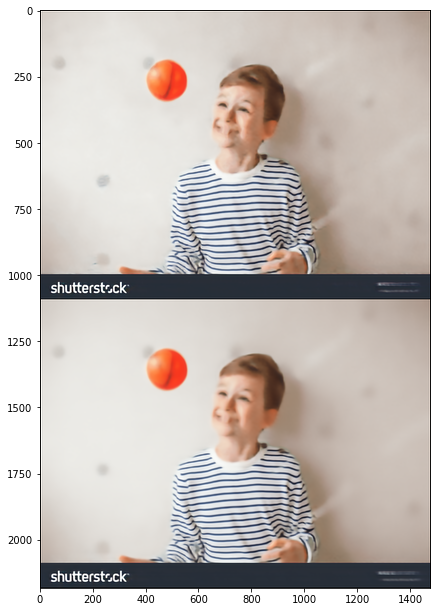

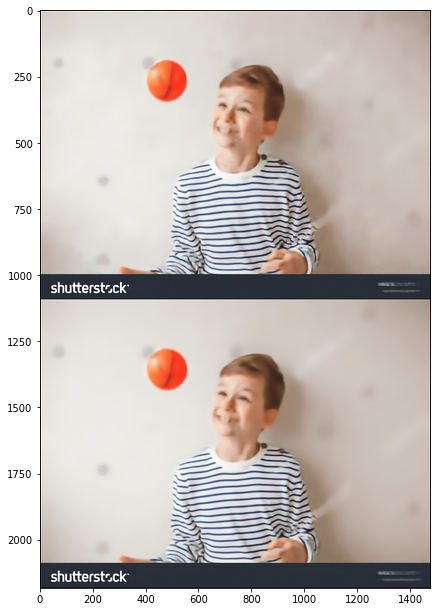

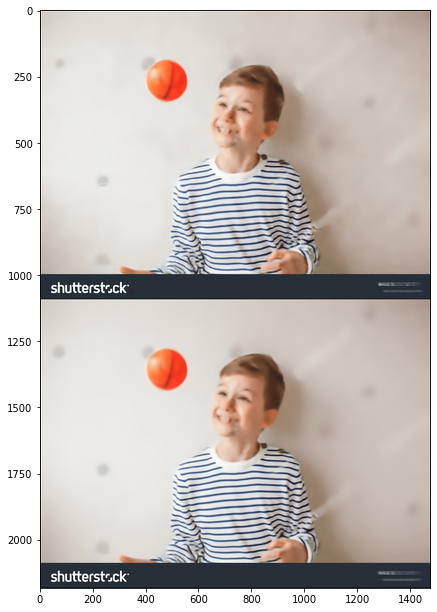

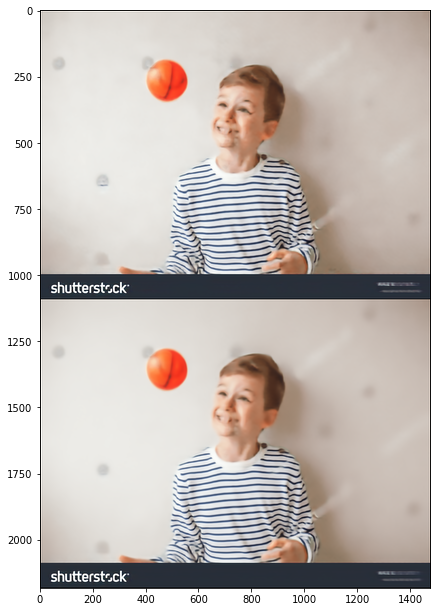

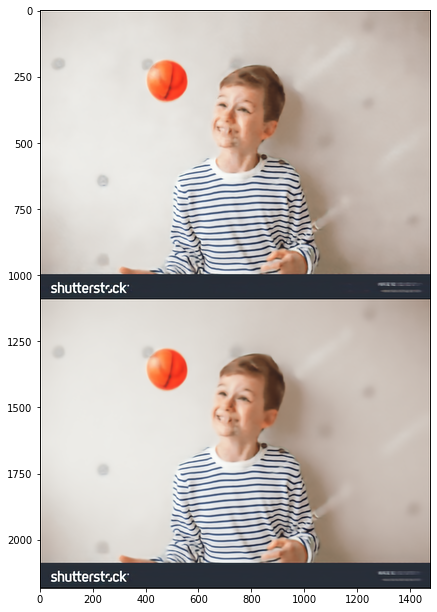

In [28]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0

i = 0
def closure():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight)
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()
        
    
    psrn_noisy = compare_psnr(img_noisy_np, out.detach().cpu().numpy()[0]) 
    psrn_gt    = compare_psnr(img_np, out.detach().cpu().numpy()[0]) 
    psrn_gt_sm = compare_psnr(img_np, out_avg.detach().cpu().numpy()[0]) 
    
    # Note that we do not have GT for the "snail" example
    # So 'PSRN_gt', 'PSNR_gt_sm' make no sense
    print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1), 
                         np.clip(torch_to_np(out_avg), 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


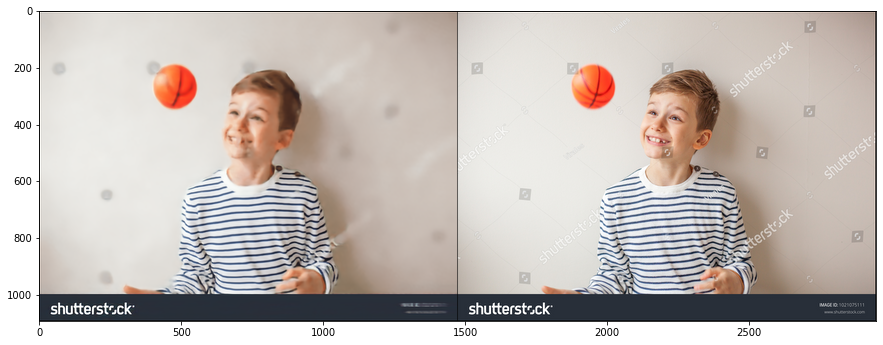

In [29]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_np], factor=13);

#deep-image-prior inpainting

# BERT fine-tuned

In [0]:
import tensorflow_hub as hub
print(hub.__version__)

#Installing BERT module
!pip install bert-tensorflow

#Importing BERT modules
import bert
from bert import run_classifier, optimization, tokenization

0.7.0
     |████████████████████████████████| 71kB 2.1MB/s 



In [0]:
def create_examples(df, labels_available=True):
    """
    Creates input examples for the sets of texts and labels.
    https://github.com/google-research/bert/blob/cc7051dc592802f501e8a6f71f8fb3cf9de95dc9/run_classifier.py#L127    
    """
    examples = []
    for (i, row) in enumerate(df.values):
        guid = None  #row[0]
        text_a = row[0]
        if labels_available:
            labels = row[1:].tolist()
        else:  # what should be here in test phase
            labels = [0, 0, 0, 0, 0, 0]
        examples.append(
            bert.run_classifier.InputExample(guid=guid,
                                             text_a=text_a,
                                             label=labels))
    return examples

In [0]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1"


def create_tokenizer_from_hub_module(bert_path):
    """Get the vocab file and casing info from the Hub module."""
    bert_module = hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info",
                                    as_dict=True)
    vocab_file, do_lower_case = sess.run([
        tokenization_info["vocab_file"],
        tokenization_info["do_lower_case"],
    ])
    print('loading tokenizer with{} lowercasing'.format('out' *
                                                        (not do_lower_case)))

    return bert.tokenization.FullTokenizer(vocab_file=vocab_file,
                                           do_lower_case=do_lower_case)


bert_tokenizer = create_tokenizer_from_hub_module(BERT_MODEL_HUB)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


loading tokenizer without lowercasing



In [0]:
#todo: split to funct like here https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22
class InputFeatures(object):
    """
    A single set of features of data.
    https://github.com/google-research/bert/blob/cc7051dc592802f501e8a6f71f8fb3cf9de95dc9/run_classifier.py#L161
    The only difference from the original implementation (line above) is label_ids instead of label_id because
    here we solve multi-label not multi-class task.
    """
    def __init__(self,
                 input_ids,
                 input_mask,
                 segment_ids,
                 label_ids,
                 is_real_example=True):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_ids = label_ids,
        self.is_real_example = is_real_example


# split like here
# https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22
def convert_examples_to_features(examples, max_seq_length, tokenizer):
    """Loads a data file into a list of `InputBatch`s."""

    features = []
    for (ex_index, example) in tqdm(enumerate(examples), total=len(examples)):

        #print(example.text_a)
        tokens_a = tokenizer.tokenize(example.text_a)
        tokens_b = None
        if example.text_b:
            tokens_b = tokenizer.tokenize(example.text_b)
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > max_seq_length - 2:
                tokens_a = tokens_a[:(max_seq_length - 2)]

        # The convention in BERT is:
        # (a) For sequence pairs:
        #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
        #  type_ids: 0   0  0    0    0     0       0 0    1  1  1  1   1 1
        # (b) For single sequences:
        #  tokens:   [CLS] the dog is hairy . [SEP]
        #  type_ids: 0   0   0   0  0     0 0
        #
        # Where "type_ids" are used to indicate whether this is the first
        # sequence or the second sequence. The embedding vectors for `type=0` and
        # `type=1` were learned during pre-training and are added to the wordpiece
        # embedding vector (and position vector). This is not *strictly* necessary
        # since the [SEP] token unambigiously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.
        #
        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        """
        # in original repo
        tokens = []
        segment_ids = []
        tokens.append("[CLS]")
        segment_ids.append(0)
        for token in tokens_a:
            tokens.append(token)
            segment_ids.append(0)
        tokens.append("[SEP]")
        segment_ids.append(0)
        """
        tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
        segment_ids = [0] * len(tokens)
        """
        # in original repo
        if tokens_b:
        for token in tokens_b:
            tokens.append(token)
            segment_ids.append(1)
        tokens.append("[SEP]")
        segment_ids.append(1)
        """
        if tokens_b:
            tokens += tokens_b + ["[SEP]"]
            segment_ids += [1] * (len(tokens_b) + 1)

        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        '''
        # in original repo
        while len(input_ids) < max_seq_length:
          input_ids.append(0)
          input_mask.append(0)
          segment_ids.append(0)
        '''
        padding = [0] * (max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length

        labels_ids = []
        for label in example.label:
            labels_ids.append(int(label))

        if ex_index < 2:  # make as param with default value
            logger.info("*** Example ***")
            logger.info("guid: %s" % (example.guid))
            logger.info("tokens: %s" % " ".join([str(x) for x in tokens]))
            logger.info("input_ids: %s" % " ".join([str(x)
                                                    for x in input_ids]))
            logger.info("input_mask: %s" %
                        " ".join([str(x) for x in input_mask]))
            logger.info("segment_ids: %s" %
                        " ".join([str(x) for x in segment_ids]))
            logger.info("label: %s (id = %s)" % (example.label, labels_ids))

        features.append(
            InputFeatures(input_ids=input_ids,
                          input_mask=input_mask,
                          segment_ids=segment_ids,
                          label_ids=labels_ids))
    return features

In [0]:
def features_to_arrays(features):
    """Convert a list of InputFeatures to np.arrays"""

    all_input_ids = []
    all_input_mask = []
    all_segment_ids = []

    for feature in features:
        all_input_ids.append(feature.input_ids)
        all_input_mask.append(feature.input_mask)
        all_segment_ids.append(feature.segment_ids)

    return (np.array(all_input_ids, dtype='int32'), 
            np.array(all_input_mask, dtype='int32'), 
            np.array(all_segment_ids, dtype='int32'))

In [0]:
def text2input_arrays(text, tokenizer, max_seq_length, labels_available, del_text=True):
    examples = create_examples(text, labels_available=labels_available)
    features = convert_examples_to_features(examples,  max_seq_length, tokenizer)
    input_ids, input_masks, segment_ids = features_to_arrays(features)

    if del_text:
        del text
        gc.collect()

    return input_ids, input_masks, segment_ids

In [0]:
preprocessed_train_with_labels = pd.concat([
    pd.DataFrame(preprocessed_train, columns=['preprocessed_text']),
    pd.DataFrame(train_labels, columns=TARGET_COLS)
], axis=1)
preprocessed_train_with_labels.head(2)

preprocessed_text  ...  identity_hate
0  explanation why edits made username hardcore m...  ...              0
1  d'aww ! he matches background colour i'm seemi...  ...              0

[2 rows x 7 columns]

In [0]:
del preprocessed_train
gc.collect()

In [0]:
%%time

train_input_ids, train_input_masks, train_segment_ids = text2input_arrays(
    text=preprocessed_train_with_labels,
    tokenizer=bert_tokenizer,
    max_seq_length=MAX_WORDS_IN_COMMENT,
    labels_available=True)


CPU times: user 2min 19s, sys: 1.57 s, total: 2min 20s
Wall time: 2min 20s


In [0]:
train_input_ids, valid_input_ids, \
train_input_masks, valid_input_masks, \
train_segment_ids, valid_segment_ids, \
train_labels, valid_labels = \
train_test_split(train_input_ids, train_input_masks, train_segment_ids, train_labels, test_size = 0.1, shuffle=True)

TODO: create pipeline which uses features as is or without data->features->arrays but data->arrays

In [0]:
class BertLayer(tf.keras.layers.Layer):
    def __init__(self,
                 bert_path,
                 verbose=True,
                 n_fine_tune_layers=10,
                 **kwargs):
        self.bert_path = bert_path
        self.n_fine_tune_layers = n_fine_tune_layers
        self.trainable = True
        # parse it with regular expression
        self.output_size = 768
        self.verbose = verbose
        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(self.bert_path,
                               trainable=self.trainable,
                               name="{}_module".format(self.name))
        trainable_vars = self.bert.variables

        # Remove unused layers
        trainable_vars = [
            var for var in trainable_vars if not "/cls/" in var.name
        ]

        # Select how many layers to fine tune
        trainable_vars = trainable_vars[-self.n_fine_tune_layers:]

        # Add to trainable weights
        for var in trainable_vars:
            self._trainable_weights.append(var)

        # Add non-trainable weights
        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)

        if self.verbose:
            print("*** TRAINABLE VARS *** ")
            for var in self._trainable_weights:
                print(var)

        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        #inputs = [inputs.input_ids, inputs.input_mask, inputs.segment_ids]
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(input_ids=input_ids,
                           input_mask=input_mask,
                           segment_ids=segment_ids)
        result = self.bert(inputs=bert_inputs,
                           signature="tokens",
                           as_dict=True)["pooled_output"]
        """
        output = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)
        
        if self.pooling == "cls":
            pooled = output["pooled_output"]
        else:
            result = output["sequence_output"]
            
            input_mask = tf.cast(input_mask, tf.float32)
            mul_mask = lambda x, m: x * tf.expand_dims(m, axis=-1)
            masked_reduce_mean = lambda x, m: tf.reduce_sum(mul_mask(x, m), axis=1) / (
                    tf.reduce_sum(m, axis=1, keepdims=True) + 1e-10)
            
            if self.pooling == "mean":
              pooled = masked_reduce_mean(result, input_mask)
            else:
              pooled = mul_mask(result, input_mask)

        return pooled
        """

        return result

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'bert_path': self.bert_path,
            'verbose': self.verbose,
            'n_fine_tune_layers': self.n_fine_tune_layers,
        })
        return config


# can take more fully model from https://github.com/strongio/keras-bert/blob/master/keras-bert.ipynb

In [0]:
# Build model
def build_model(max_seq_length): 
    in_id = tf.keras.layers.Input(shape=(max_seq_length,), name="input_ids")
    in_mask = tf.keras.layers.Input(shape=(max_seq_length,), name="input_masks")
    in_segment = tf.keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
    bert_inputs = [in_id, in_mask, in_segment]
    
    # Instantiate the custom Bert Layer defined above
    bert_output = BertLayer(BERT_MODEL_HUB, verbose=True, n_fine_tune_layers=5)(bert_inputs)

    # Build the rest of the classifier 
    dense = tf.keras.layers.Dense(256, activation='relu')(bert_output)
    pred = tf.keras.layers.Dense(len(TARGET_COLS), activation='sigmoid')(dense)
    
    model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.summary()
    
    return model

def initialize_vars(sess):
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    K.set_session(sess)

TODO: clear memory and increase batchsize

In [0]:
RocAucES = RocAucEarlyStopping(validation_data=([valid_input_ids, valid_input_masks, valid_segment_ids], valid_labels), 
                                   patience=1, digits=4)
RocAucCheckpointer = ModelRocAucCheckpoint(filepath=output_folder+'/BertModel_multilabel.h5',
                                           validation_data=([valid_input_ids, valid_input_masks, valid_segment_ids], valid_labels),
                                            save_best_only=True,
                                            save_weights_only=False,
                                            digits=3,
                                            save_freq=1,
                                            verbose=1)

In [0]:
gc.collect()

model = build_model(max_seq_length=MAX_WORDS_IN_COMMENT)

# Instantiate variables
initialize_vars(sess)

model.fit(
    [train_input_ids, train_input_masks, train_segment_ids], 
    train_labels,
    validation_data=([valid_input_ids, valid_input_masks, valid_segment_ids], valid_labels),
    epochs=10,
    batch_size=256,
    callbacks=[RocAucES, RocAucCheckpointer]
)

*** TRAINABLE VARS *** 
<tf.Variable 'bert_layer_module/bert/encoder/layer_9/output/LayerNorm/gamma:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_module/bert/encoder/layer_9/output/dense/bias:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_module/bert/encoder/layer_9/output/dense/kernel:0' shape=(3072, 768) dtype=float32>
<tf.Variable 'bert_layer_module/bert/pooler/dense/bias:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_module/bert/pooler/dense/kernel:0' shape=(768, 768) dtype=float32>
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 220)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 220)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 220)]        0                                            
__________________________________________________________________________________________________
bert_layer (BertLayer)          (None, 768)          108931396   input_ids[0][0]                  
                                                                 input_masks[0][0]            

KeyboardInterrupt: ignored

In [0]:
# Clear and load model
del model
gc.collect()
model = build_model(MAX_WORDS_IN_COMMENT)
initialize_vars(sess)
model.load_weights(output_folder+'/BertModel_multilabel.h5')

*** TRAINABLE VARS *** 
<tf.Variable 'bert_layer_2_module/bert/encoder/layer_9/output/LayerNorm/gamma:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_2_module/bert/encoder/layer_9/output/dense/bias:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_2_module/bert/encoder/layer_9/output/dense/kernel:0' shape=(3072, 768) dtype=float32>
<tf.Variable 'bert_layer_2_module/bert/pooler/dense/bias:0' shape=(768,) dtype=float32>
<tf.Variable 'bert_layer_2_module/bert/pooler/dense/kernel:0' shape=(768, 768) dtype=float32>
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 220)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 220)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 220)]        0                                            
__________________________________________________________________________________________________
bert_layer_2 (BertLayer)        (None, 768)          108931396   input_ids[0][0]                  
                                                                 input_masks[0][0]          

In [0]:
%%time

preprocessed_test_df = pd.DataFrame(preprocessed_test,
                                    columns=['preprocessed_text'])
test_input_ids, test_input_masks, test_segment_ids = text2input_arrays(
    text=preprocessed_test_df,
    tokenizer=bert_tokenizer,
    max_seq_length=MAX_WORDS_IN_COMMENT,
    labels_available=False)


CPU times: user 2min 13s, sys: 0 ns, total: 2min 13s
Wall time: 2min 12s


In [0]:
%%time

pred  = model.predict([test_input_ids, test_input_masks, test_segment_ids])
pred.shape

CPU times: user 13min 26s, sys: 9min 42s, total: 23min 8s
Wall time: 20min 49s
